# Заняття 4

## Мета:
Розробити просту згорткову нейронну мережу (CNN) для класифікації зображень або рекурентну нейронну мережу (RNN) для генерації тексту.

## Кроки для виконання завдання:

### 1. Завантаження та попередня обробка зображень для CNN:
- Завантажте набір даних (наприклад, CIFAR-10, MNIST, або інший публічний датасет для зображень). Та розділіть його на навчальну та тестову вибірки.
- Нормалізуйте значення пікселів до діапазону [0, 1].
- Якщо необхідно, виконайте перетворення даних, такі як обрізання, повороти або віддзеркалення для збільшення кількості навчальних зображень (augmentation).


### 2. Попередня обробка тексту для RNN:
- Завантажте текстовий корпус та перетворіть його у послідовність символів або слів.
- Створіть словник для перетворення символів або слів у числові індекси.
- Розбийте текст на короткі фрагменти (наприклад, послідовності по 100 символів або слів), які будуть використовуватися як вхідні дані для RNN.


### 3. Створення архітектури CNN:
- Побудуйте просту CNN з кількох згорткових шарів (`Conv2D`) з функціями активації `ReLU`.
- Додайте шари підсемплювання (`MaxPooling2D`) після згорткових шарів для зменшення розміру.
- Розгорніть результати згорткових шарів (`Flatten`) і додайте один або більше повнозв’язаних шарів (`Dense`).
- Вихідний шар із `softmax` для класифікації зображень на категорії.


### 4. Створення архітектури RNN:
- Визначте рекурентну нейронну мережу, використовуючи шари `LSTM` або `GRU` (в залежності від обраної бібліотеки).
- Додайте один або більше рекурентних шарів з вибраною кількістю нейронів у кожному шарі.
- Додайте повнозв’язаний шар із `softmax` для прогнозування ймовірностей наступних символів або слів.


### 5. Наступні кроки схожі до минулих занять.


## Формат виконання:
- **`.ipynb` блокнот** з кодом та візуалізацією.
- Або ж код в **`.py`** з прикріпленими зображеннями результатів на гітхабі.


## Домашнє завдання:

### Initialization

In [4]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### Data initialization

In [5]:
batch_size = 64

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),  # Нормалізація для Fashion-MNIST
    ]
)

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

0.2%

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



### Import base neural network class

In [2]:
import sys

sys.path.append("../../classes")

from base_neural_net import BaseNeuralNet

### Modesls

#### CNN

In [ ]:
class FashionMNIST_CNN(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist"):
        super().__init__(tags=tags)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Learning loop

#### FashionMNIST_CNN

Epoch 1/10, Train Loss: 0.4326, Test Loss: 0.3574, Accuracy: 0.8682
Epoch 2/10, Train Loss: 0.2758, Test Loss: 0.2839, Accuracy: 0.8991
Epoch 3/10, Train Loss: 0.2340, Test Loss: 0.2726, Accuracy: 0.9004
Epoch 4/10, Train Loss: 0.2048, Test Loss: 0.2425, Accuracy: 0.9124
Epoch 5/10, Train Loss: 0.1809, Test Loss: 0.2270, Accuracy: 0.9165
Epoch 6/10, Train Loss: 0.1615, Test Loss: 0.2387, Accuracy: 0.9167
Epoch 7/10, Train Loss: 0.1442, Test Loss: 0.2422, Accuracy: 0.9151
Early stopping triggered at epoch 8


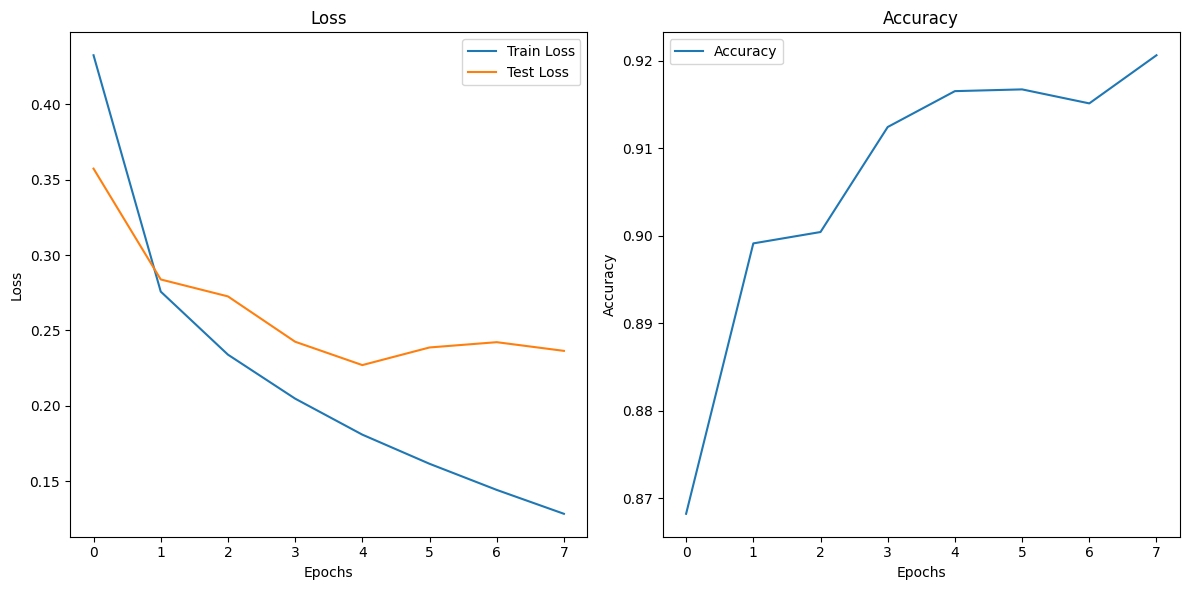

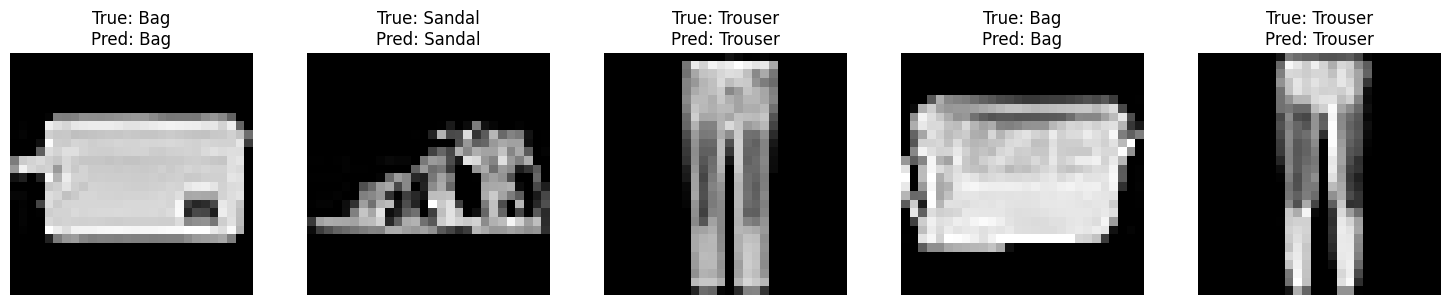

Accuracy for T-shirt/top: 87.20%
Accuracy for Trouser: 99.00%
Accuracy for Pullover: 84.40%
Accuracy for Dress: 95.60%
Accuracy for Coat: 87.90%
Accuracy for Sandal: 97.30%
Accuracy for Shirt: 76.10%
Accuracy for Sneaker: 96.70%
Accuracy for Bag: 98.40%
Accuracy for Ankle boot: 98.00%
Model saved to models/FashionMNIST_CNN__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3__v1.0.0.pth


In [7]:
fashion_mnist_cnn = FashionMNIST_CNN(tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3")
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

##### Покращення моделі

1. Збільшення обсягу даних за рахунок аугментації:

Додати більш складні трансформації (наприклад, випадковий шум, масштабування або яскравість), щоб модель навчилася краще розпізнавати сорочки та светри.

In [8]:
batch_size = 64

transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1/10, Train Loss: 0.5484, Test Loss: 0.4099, Accuracy: 0.8512
Epoch 2/10, Train Loss: 0.3727, Test Loss: 0.3754, Accuracy: 0.8619
Epoch 3/10, Train Loss: 0.3276, Test Loss: 0.3380, Accuracy: 0.8757
Epoch 4/10, Train Loss: 0.3007, Test Loss: 0.3254, Accuracy: 0.8791
Epoch 5/10, Train Loss: 0.2829, Test Loss: 0.3322, Accuracy: 0.8794
Epoch 6/10, Train Loss: 0.2688, Test Loss: 0.3075, Accuracy: 0.8899
Epoch 7/10, Train Loss: 0.2571, Test Loss: 0.2764, Accuracy: 0.8997
Epoch 8/10, Train Loss: 0.2472, Test Loss: 0.2839, Accuracy: 0.8955
Epoch 9/10, Train Loss: 0.2401, Test Loss: 0.2794, Accuracy: 0.8982
Early stopping triggered at epoch 10


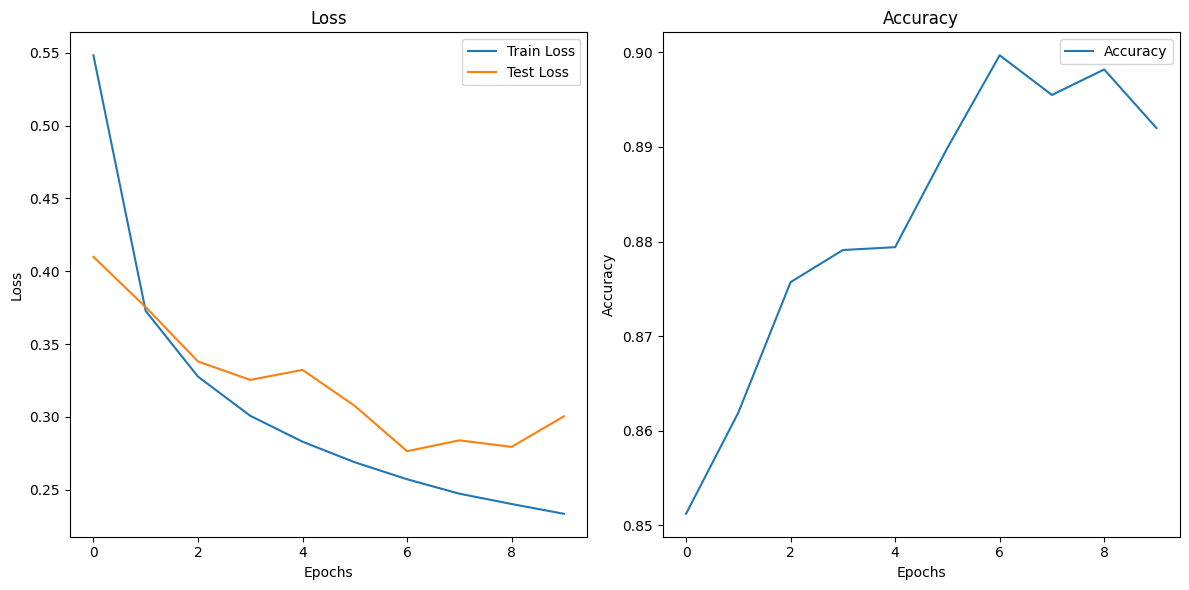

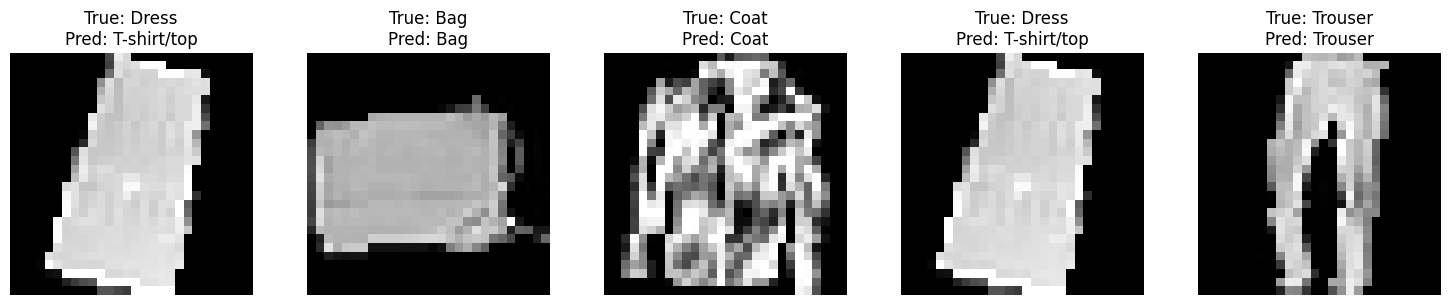

Accuracy for T-shirt/top: 87.80%
Accuracy for Trouser: 98.30%
Accuracy for Pullover: 92.60%
Accuracy for Dress: 90.40%
Accuracy for Coat: 67.40%
Accuracy for Sandal: 95.20%
Accuracy for Shirt: 68.60%
Accuracy for Sneaker: 95.70%
Accuracy for Bag: 98.90%
Accuracy for Ankle boot: 96.00%
Model saved to models/FashionMNIST_CNN__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3-rhf_rr_cj__v1.0.0.pth


In [9]:
fashion_mnist_cnn = FashionMNIST_CNN(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3/rhf_rr_cj"
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

2. Покращення архітектури:

Додамо ще один згортковий шар для глибшого виділення ознак

In [14]:
class FashionMNIST_CNN_Enh(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist/enh"):
        super().__init__(tags=tags)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = None
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        if self.fc1 is None:
            self.fc1 = nn.Linear(x.view(x.size(0), -1).size(1), 128)
            self.add_module("fc1", self.fc1)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch 1/10, Train Loss: 0.6322, Test Loss: 0.4956, Accuracy: 0.8188
Epoch 2/10, Train Loss: 0.4254, Test Loss: 0.4311, Accuracy: 0.8463
Epoch 3/10, Train Loss: 0.3754, Test Loss: 0.3850, Accuracy: 0.8613
Epoch 4/10, Train Loss: 0.3478, Test Loss: 0.3649, Accuracy: 0.8729
Epoch 5/10, Train Loss: 0.3280, Test Loss: 0.3385, Accuracy: 0.8829
Epoch 6/10, Train Loss: 0.3131, Test Loss: 0.3388, Accuracy: 0.8762
Epoch 7/10, Train Loss: 0.3010, Test Loss: 0.3212, Accuracy: 0.8808
Epoch 8/10, Train Loss: 0.2922, Test Loss: 0.3173, Accuracy: 0.8865
Epoch 9/10, Train Loss: 0.2820, Test Loss: 0.3155, Accuracy: 0.8850
Epoch 10/10, Train Loss: 0.2753, Test Loss: 0.3166, Accuracy: 0.8863


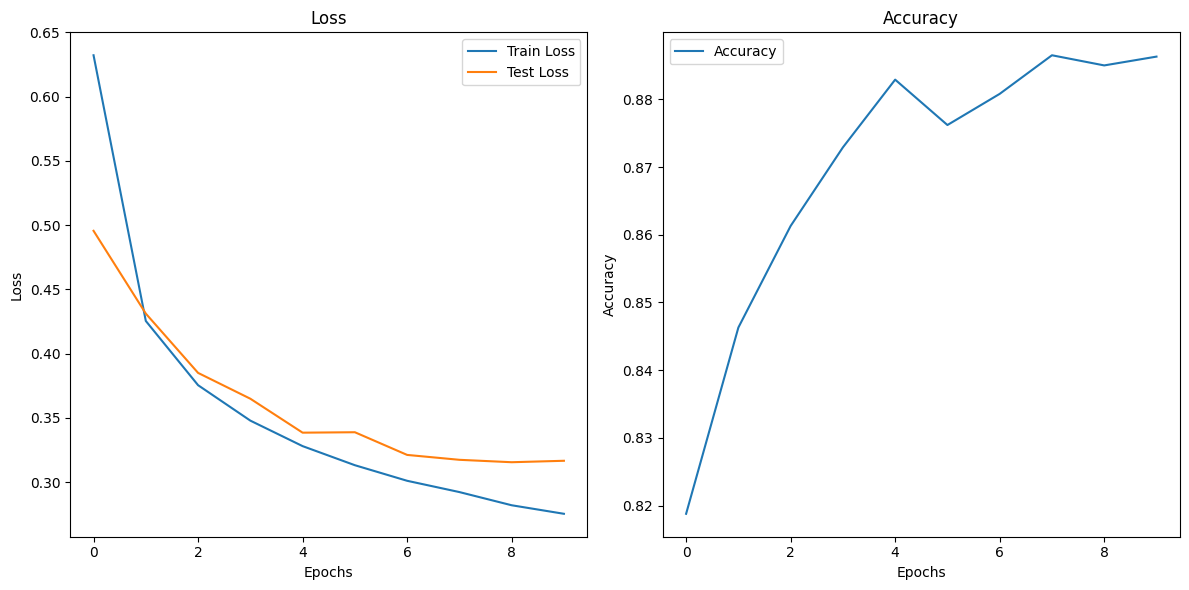

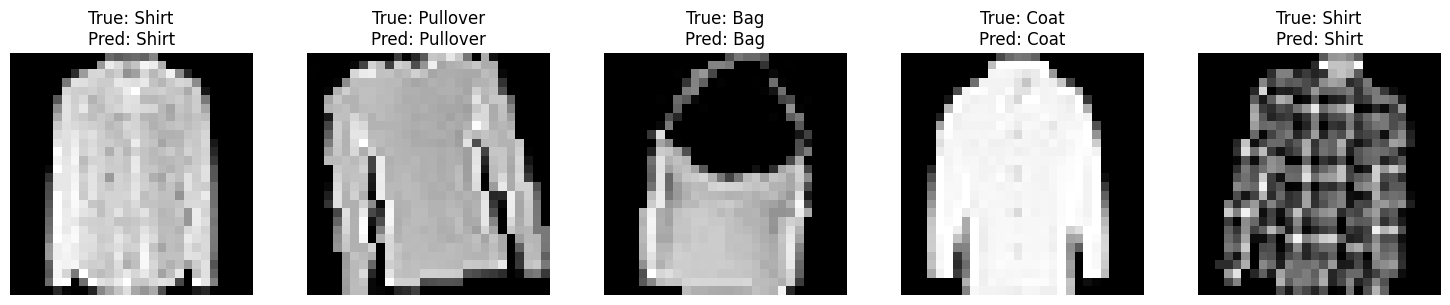

Accuracy for T-shirt/top: 80.30%
Accuracy for Trouser: 95.90%
Accuracy for Pullover: 87.10%
Accuracy for Dress: 90.20%
Accuracy for Coat: 82.60%
Accuracy for Sandal: 91.70%
Accuracy for Shirt: 72.40%
Accuracy for Sneaker: 98.10%
Accuracy for Bag: 95.20%
Accuracy for Ankle boot: 93.00%
Model saved to models/FashionMNIST_CNN_Enh__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3-rhf_rr_cj__v1.0.0.pth


In [15]:
fashion_mnist_cnn = FashionMNIST_CNN_Enh(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3/rhf_rr_cj"
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

3. Використання Dropout:

Додамо Dropout до повнозв’язних шарів для зменшення перенавчання

In [16]:
class FashionMNIST_CNN_Enh_DO(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist/enh/do", p_dropout=0.5):
        super().__init__(tags=tags)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p_dropout)
        self.fc1 = None
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        if self.fc1 is None:
            self.fc1 = nn.Linear(x.view(x.size(0), -1).size(1), 128)
            self.add_module("fc1", self.fc1)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Epoch 1/10, Train Loss: 0.7960, Test Loss: 0.5262, Accuracy: 0.8032
Epoch 2/10, Train Loss: 0.5590, Test Loss: 0.4677, Accuracy: 0.8265
Epoch 3/10, Train Loss: 0.5058, Test Loss: 0.4284, Accuracy: 0.8419
Epoch 4/10, Train Loss: 0.4683, Test Loss: 0.3952, Accuracy: 0.8522
Epoch 5/10, Train Loss: 0.4461, Test Loss: 0.3934, Accuracy: 0.8544
Epoch 6/10, Train Loss: 0.4249, Test Loss: 0.3754, Accuracy: 0.8616
Epoch 7/10, Train Loss: 0.4103, Test Loss: 0.3625, Accuracy: 0.8680
Epoch 8/10, Train Loss: 0.3986, Test Loss: 0.3448, Accuracy: 0.8740
Epoch 9/10, Train Loss: 0.3891, Test Loss: 0.3515, Accuracy: 0.8694
Epoch 10/10, Train Loss: 0.3769, Test Loss: 0.3278, Accuracy: 0.8811


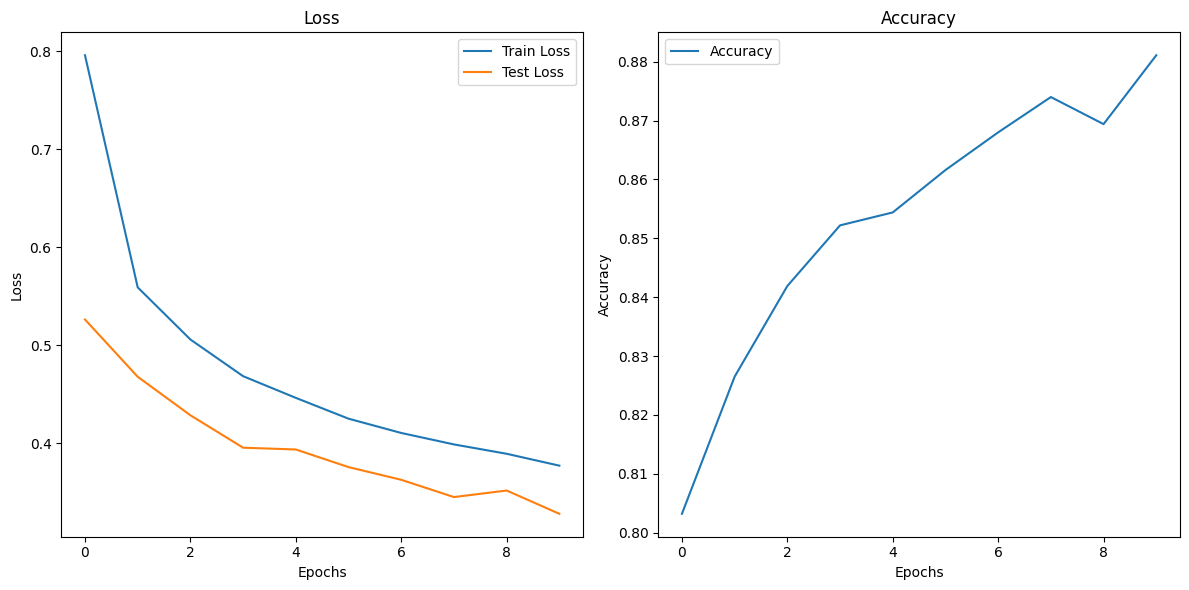

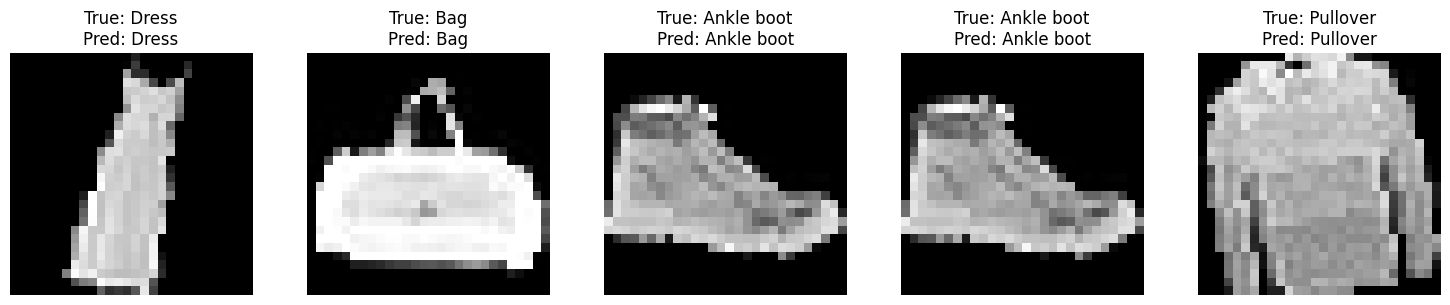

Accuracy for T-shirt/top: 78.50%
Accuracy for Trouser: 96.60%
Accuracy for Pullover: 76.80%
Accuracy for Dress: 88.10%
Accuracy for Coat: 86.50%
Accuracy for Sandal: 95.40%
Accuracy for Shirt: 67.10%
Accuracy for Sneaker: 95.50%
Accuracy for Bag: 96.80%
Accuracy for Ankle boot: 95.50%
Model saved to models/FashionMNIST_CNN_Enh_DO__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3-rhf_rr_cj-pdo=05__v1.0.0.pth


In [17]:
fashion_mnist_cnn = FashionMNIST_CNN_Enh_DO(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3/rhf_rr_cj/pdo=05", p_dropout=0.5
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")